<h3> FINTRAC Data

In [1]:
import piplite
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
%matplotlib inline

In [3]:
import math

<h1> Load datasets

In [4]:
eft=pd.read_csv("raw_eft_data.csv")
fintrac=pd.read_csv("fintrac.csv")
eft_sub=pd.read_csv("EFT_subset.csv")

In [5]:
fintrac['Tran Date']= pd.to_datetime(fintrac['Tran Date'])
fintrac['Filing Date']= pd.to_datetime(fintrac['Filing Date'])
fintrac['Month-Year']=fintrac['Tran Date'].dt.to_period('M').astype(str)
fintrac['Client ID']=fintrac['Client ID'].astype('category')
eft["Tran Amt"]=eft["TRANSACTION_AMOUNT"].abs()

In [7]:
fintrac['Report Type']

0      EFTO
1      EFTO
2      EFTO
3      EFTO
4      EFTO
       ... 
862    EFTI
863    EFTI
864    EFTI
865    EFTI
866    EFTO
Name: Report Type, Length: 867, dtype: object

In [23]:
pd.options.display.float_format='{:.0f}'.format
fintrac.describe(exclude='number')
fintrac.describe()

<ipython-input-23-0faf4fd9bed5>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  fintrac.describe(exclude='number')
<ipython-input-23-0faf4fd9bed5>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  fintrac.describe(exclude='number')


,Tran Time,Tran Amt
count,867,867
mean,70620,61978
std,70126,123821
min,0,97
25%,0,13182
50%,104232,21000
75%,140025,50866
max,181000,1700000


<h2> Transaction Amount and Count

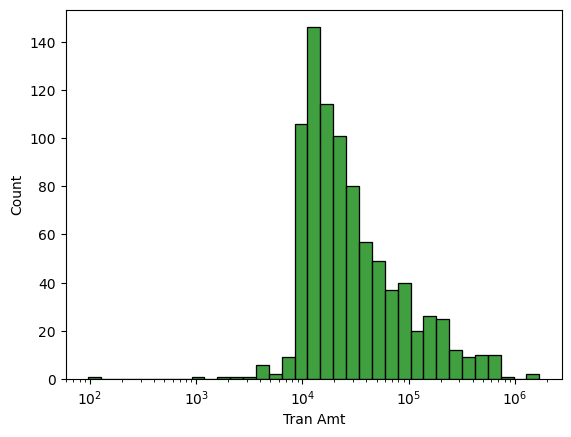

In [43]:
sns.histplot(fintrac['Tran Amt'],log_scale=True,color="green")
plt.show()

In [17]:
fintrac.describe(include='all')

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID
count,867,867,867,867,867.000000,8.670000e+02,867,8.670000e+02
unique,867,234,2,270,NaN,NaN,2,NaN
top,EFTO2019080100001001,2020-03-27,EFTO,2020-02-04,NaN,NaN,CAD,NaN
freq,1,14,469,8,NaN,NaN,787,NaN
mean,NaN,NaN,NaN,NaN,70620.324106,6.197839e+04,NaN,2.730837e+06
std,NaN,NaN,NaN,NaN,70125.958665,1.238207e+05,NaN,3.455560e+05
min,NaN,NaN,NaN,NaN,0.000000,9.700000e+01,NaN,2.003886e+06
25%,NaN,NaN,NaN,NaN,0.000000,1.318250e+04,NaN,2.461033e+06
50%,NaN,NaN,NaN,NaN,104232.000000,2.100000e+04,NaN,2.699291e+06
75%,NaN,NaN,NaN,NaN,140025.000000,5.086550e+04,NaN,3.069741e+06


In [15]:
#Check for missing values
fintrac.isnull().sum()/len(fintrac)*100

Report Ref     0.0
Filing Date    0.0
Report Type    0.0
Tran Date      0.0
Tran Time      0.0
Tran Amt       0.0
Tran Cur       0.0
Client ID      0.0
dtype: float64

In [16]:
#check for duplicate rows
fintrac.duplicated().sum()

0

In [18]:
fintrac.head()

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID
0,EFTO2019080100001001,2019-08-01,EFTO,2019-07-30,153443,28000.0,CAD,2286141
1,EFTO2019080100001002,2019-08-01,EFTO,2019-07-30,153443,10000.0,CAD,2456977
2,EFTO2019080100001003,2019-08-01,EFTO,2019-07-31,132351,23690.0,USD,3182054
3,EFTO2019080200001001,2019-08-02,EFTO,2019-08-01,154452,20000.0,CAD,3193091
4,EFTO2019080600001001,2019-08-06,EFTO,2019-08-02,134746,33436.0,CAD,2911297


<h2> Number of Transactions

Text(0, 0.5, 'Number of Transactions per Month')

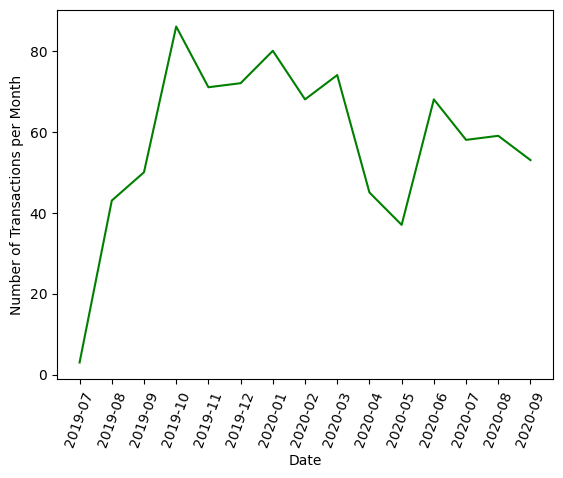

In [10]:
monthly_count=fintrac.groupby(['Month-Year'])['Tran Amt'].count().reset_index()
plt.xticks(rotation=70)
plt.plot(monthly_count['Month-Year'],monthly_count['Tran Amt'],color="green")
plt.xlabel("Date")
plt.ylabel("Number of Transactions per Month")

<h1> Top Clients

In [8]:
#amount per client
topcustomer_amt=fintrac.groupby('Client ID')['Tran Amt'].sum().sort_values(ascending=False).reset_index()
topcustomer_amt_rank=topcustomer_amt.head(10)
df=topcustomer_amt_rank

In [10]:
df.tail()

,Client ID,Tran Amt
5,3213778,873301.00
6,3029080,847210.00
7,2900653,726942.67
8,3137306,650000.00
9,2699291,648528.49


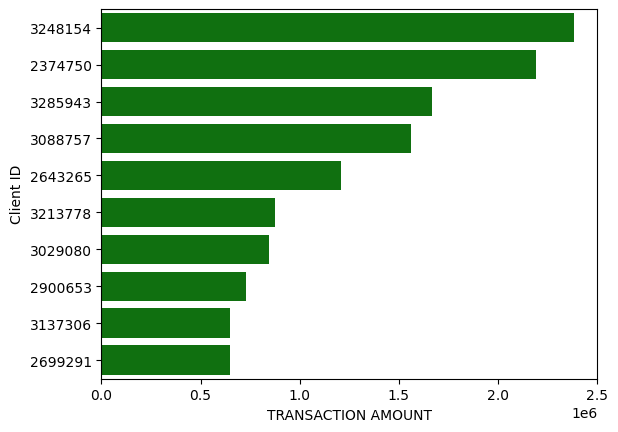

In [37]:
sns.barplot(x="Tran Amt",y="Client ID",data=df,order=df['Client ID'],orient='h',color="green")
plt.xlabel("TRANSACTION AMOUNT")
plt.ylabel("Client ID")
plt.show()

<h3> Find client IDs from FINTRAC that are not in EFT data

In [15]:
id=list(pd.unique(eft['CIF']))
len(id)
fintrac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Report Ref      867 non-null    object        
 1   Filing Date     867 non-null    datetime64[ns]
 2   Report Type     867 non-null    object        
 3   Tran Date       867 non-null    object        
 4   Tran Time       867 non-null    int64         
 5   Tran Amt        867 non-null    float64       
 6   Tran Cur        867 non-null    object        
 7   Client ID       867 non-null    category      
 8   Month-Year      867 non-null    object        
 9   Tran Amt_round  867 non-null    int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 61.8+ KB


In [19]:
fintrac_id=fintrac[~fintrac["Client ID"].isin(id)]

In [20]:
fintrac_id=pd.unique(fintrac_id['Client ID'])
fintrac_id=pd.DataFrame(data={'Client ID_1':fintrac_id[:6],'Client ID_2':fintrac_id[6:12],'Client ID_3':fintrac_id[12:]})

In [22]:
fintrac_id=fintrac[~fintrac["Client ID"].isin(id)]

<h3> Find matching client IDs,but with unmatching AMOUNT from FINTRAC that are not in EFT data

In [23]:
fintrac1=fintrac[fintrac["Client ID"].isin(id)]
len(fintrac1)==len(fintrac)-len(fintrac_id)

True

In [24]:
fintrac_amt=fintrac1[~fintrac1['Tran Amt'].isin(eft['Tran Amt'])]

In [128]:
fintrac_amt[fintrac_amt['Client ID']==2702904]

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID,Month-Year
550,EFTI2020040700001001,2020-04-07,EFTI,03-Apr-20,0,54740.0,CAD,2702904,2020-04


In [127]:
eft[eft['CIF']==2702904]

,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DECRIPTION,TIME_SEQ,Tran Amt
73554,2702904,3-Apr-20,54739.53,CM,International Wire,11:49:54,54739.53
76336,2702904,1-Apr-20,130536.13,CM,International Wire,11:03:58,130536.13


In [9]:
eft['Tran Amt_round']=eft['Tran Amt'].apply(math.ceil)
fintrac_amt_approx=(fintrac1['Tran Amt'].isin(eft['Tran Amt_round'])|
                     fintrac1['Tran Amt'].isin(eft['Tran Amt']))

<class 'NameError'>: name 'fintrac1' is not defined

In [181]:
fintrac1=fintrac1[~fintrac_amt_approx]
len(fintrac1)

44

In [182]:
fintrac1.tail()

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID,Month-Year
84,EFTO2019092600001001,2019-09-26,EFTO,20-Sep-19,153712,164935.0,CAD,2563643,2019-09
87,EFTO2019092700001001,2019-09-27,EFTO,23-Sep-19,153911,429128.0,CAD,2256224,2019-09
91,EFTI2019100100002001,2019-10-01,EFTI,24-Sep-19,0,9910.0,CAD,2764790,2019-09
92,EFTI2019100100002002,2019-10-01,EFTI,24-Sep-19,0,7567.0,CAD,2764790,2019-09
467,EFTO2020030200001004,2020-03-02,EFTO,28-Feb-20,133643,61370.0,CAD,2052532,2020-02


In [187]:
fintrac1[fintrac1['Client ID']==2563643]

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID,Month-Year
84,EFTO2019092600001001,2019-09-26,EFTO,20-Sep-19,153712,164935.0,CAD,2563643,2019-09


In [186]:
eft[eft['CIF']==2563643]

,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DECRIPTION,TIME_SEQ,Tran Amt,Tran Amt_round
23565,2563643,25-Nov-19,-2800.00,DM,Returned Item,14:21:01,2800.00,2800
41370,2563643,13-Jan-20,-14736.73,DM,Funds Wired to/from,11:30:10,14736.73,14737


<h2> Find number of unmatching dates

In [25]:
fintrac['Tran Date']=pd.to_datetime(fintrac['Tran Date']).apply(lambda x: x.strftime('%d-%b-%y'))
eft_date=list(eft['EFFECTIVE_DATE'])
fintrac_time=fintrac1[~fintrac1['Tran Date'].isin(eft_date)]
fintrac_time.head()

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID,Month-Year,Tran Amt_round
1,EFTO2019080100001002,2019-08-01,EFTO,30-Jul-19,153443,10000.0,CAD,2456977,2019-07,10000
2,EFTO2019080100001003,2019-08-01,EFTO,31-Jul-19,132351,23690.0,USD,3182054,2019-07,23690
3,EFTO2019080200001001,2019-08-02,EFTO,01-Aug-19,154452,20000.0,CAD,3193091,2019-08,20000
4,EFTO2019080600001001,2019-08-06,EFTO,02-Aug-19,134746,33436.0,CAD,2911297,2019-08,33436
5,EFTO2019080600001002,2019-08-06,EFTO,02-Aug-19,135350,22000.0,CAD,2621260,2019-08,22000


In [195]:
eft[eft['CIF']==3182054	]

,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DECRIPTION,TIME_SEQ,Tran Amt,Tran Amt_round
123017,3182054,13-Aug-20,-5000.0,DM,International Wire,14:06:45,5000.0,5000


In [197]:
len(fintrac_time)

43

<h2> Use left outer join

In [26]:
fintrac['Tran Date']=pd.to_datetime(fintrac['Tran Date']).apply(lambda x: x.strftime('%d-%b-%y'))
fintrac['Tran Amt_round']=fintrac['Tran Amt'].apply(math.ceil)

In [7]:
fintrac['Tran Amt_round']

0      28000
1      10000
2      23690
3      20000
4      33436
       ...  
862    20433
863    32574
864     4914
865    60000
866    20200
Name: Tran Amt_round, Length: 867, dtype: int64

In [27]:
eft_col=['CIF','EFFECTIVE_DATE','Tran Amt_round']
eft=eft[eft_col]

In [28]:
eft.columns=['Client ID','Tran Date','Tran Amt_round']

In [29]:
dups=eft.duplicated()
eft_unique=eft[~dups]

In [30]:
fin_eft=pd.merge(fintrac[['Client ID','Tran Date','Tran Amt_round']],eft_unique,how="left",on=['Client ID','Tran Date','Tran Amt_round'],indicator=True)

In [31]:
fin_sub=fin_eft[fin_eft['_merge']=="left_only"]

In [32]:
def include(x):
    if x=="both":
        return True
    else:
        return False
        

In [33]:
y=fin_eft['_merge'].apply(lambda x: include(x))
fin_eft['include']=y

In [34]:
fin_sub=fintrac[~y]

In [35]:
len(fin_sub)

457

In [243]:
fin_sub.to_csv("FINTRAC 2.csv")

<h2> Timeliness

In [12]:
fintrac['Filing Date']=pd.to_datetime(fintrac['Filing Date']).apply(lambda x: x.strftime('%d-%b-%y'))

In [13]:
fintrac['Filing Date']=pd.to_datetime(fintrac['Filing Date'])
fintrac['Tran Date']=pd.to_datetime(fintrac['Tran Date'])

In [14]:
t=fintrac['Filing Date']-fintrac['Tran Date']

In [15]:
t=pd.DataFrame(t,columns=['Time_diff'])

<AxesSubplot:xlabel='Time_diff', ylabel='Count'>

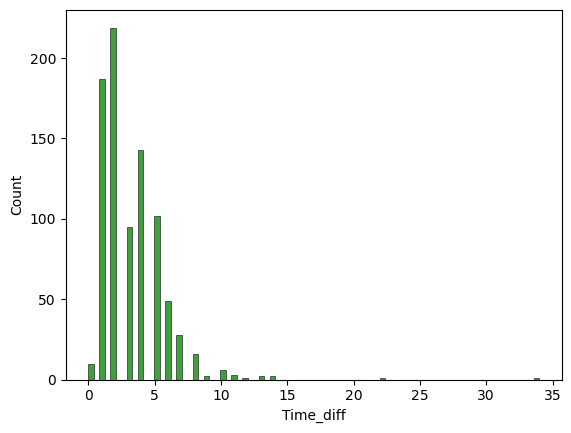

In [313]:
sns.histplot(t['Time_diff'].astype('timedelta64[D]'),color="green")

In [16]:
Reporting=t.value_counts().rename_axis('time_diff').to_frame('counts')

In [17]:
Reporting

,counts
time_diff,
2 days,219
1 days,187
4 days,143
5 days,102
3 days,95
6 days,49
7 days,28
8 days,16
0 days,10


In [323]:
timely=t.le(pd.Timedelta(days=0)).all(1)

In [325]:
fintrac_timely=fintrac[timely]
fintrac_timely

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID,Month-Year
20,EFTO2019081500001002,2019-08-15,EFTO,2019-08-15,140030,205577.0,CAD,3167108,2019-08
350,EFTO2020011400001002,2020-01-14,EFTO,2020-01-14,104242,35000.0,CAD,2624482,2020-01
388,EFTO2020012400001004,2020-01-24,EFTO,2020-01-24,104252,10000.0,CAD,2003886,2020-01
434,EFTO2020021300002001,2020-02-13,EFTO,2020-02-13,135050,10000.0,CAD,2935186,2020-02
479,EFTO2020030400001002,2020-03-04,EFTO,2020-03-04,104806,108000.0,CAD,3088309,2020-03
500,EFTO2020031200001002,2020-03-12,EFTO,2020-03-12,134649,100000.0,CAD,2946417,2020-03
574,EFTO2020042400001001,2020-04-24,EFTO,2020-04-24,154819,260000.0,CAD,3267278,2020-04
634,EFTO2020060300002001,2020-06-03,EFTO,2020-06-03,105004,15000.0,CAD,2935186,2020-06
640,EFTO2020060800001001,2020-06-08,EFTO,2020-06-08,135845,13000.0,CAD,3267278,2020-06
758,EFTO2020080600002001,2020-08-06,EFTO,2020-08-06,110310,25000.0,CAD,3104849,2020-08
